In [1]:
import lightgbm as lgb 
#from pylightgbm.models import GBMRegressor 


C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [89]:
len(train_val_xy.columns)

124

In [58]:
final_feature = pd.read_csv("C:\\Users\\CDA\\graduated_design\\score\\final_feature.csv")

list_final_feature = final_feature["final_feture"].tolist()

list_final_feature.extend(["user_id"])
final_train = final_train[list_final_feature]



common_path_1 = "C:\\Users\\CDA\\graduated_design\\data\\train_data\\"
overdue_train = pd.read_table(os.path.join(common_path_1,"overdue_train.txt"),sep = ",",header = None, names = ["user_id","is_overdue"])
final_train = pd.merge(final_train,overdue_train,how = "inner",on = "user_id")
train_val_xy,offline_xy = train_test_split(final_train,test_size = 0.15,random_state = 7)
offline_x = offline_xy.drop(["user_id","is_overdue"],axis = 1)
offline_y = offline_xy["is_overdue"]

train_val_x = train_val_xy.drop(["user_id","is_overdue"],axis = 1)
train_val_y = train_val_xy["is_overdue"]

train_xy,val_xy = train_test_split(train_val_xy,test_size = 0.2,random_state = 7)
train_X = train_xy.drop(["user_id","is_overdue"],axis = 1)
train_y = train_xy["is_overdue"]
val_X = val_xy.drop(["user_id","is_overdue"],axis = 1)
val_y = val_xy["is_overdue"]

In [68]:
def auc2(m, data):   
    return (metrics.roc_auc_score(y_train,m.predict(data)))  
print(time.time())
lg = lgb.LGBMClassifier(random_state = 2,silent=False,
                       min_child_weight = 0.8,reg_lambda = 0.4,n_estimator = 400,reg_alpha = 0.9,
                       min_child_samples = 30,min_split_gain = 0.5,num_leaves = 32,subsample = 0.8,colsample_bytree = 0.7,
                       max_depth = 7,learning_rate = 0.07)  
param_dist = {"subsample" : [0.8,0.78],
              "colsample_bytree" : [0.7,0.68]
             } 
#lambda  控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="roc_auc", verbose=5)  
grid_search.fit(train_X,train_y)  
print(grid_search.best_estimator_)
print(grid_search.best_score_)
#print(grid_search.cv_results_)
print(grid_search.best_params_)
  
#d_train = lgb.Dataset(train, label=y_train)  
#params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}  
  
# Without Categorical Features  
#model2 = lgb.train(params, d_train)  
#auc2(model2, train, test)  
  
#With Catgeorical Features  
#cate_features_name = ["MONTH","DAY","DAY_OF_WEEK","AIRLINE","DESTINATION_AIRPORT",  
#                 "ORIGIN_AIRPORT"]  
#model2 = lgb.train(params, d_train, categorical_feature = cate_features_name)  
#auc2(model2, train, test)  

1526016852.6344156
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:   58.1s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   59.2s finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
        learning_rate=0.07, max_depth=7, min_child_samples=30,
        min_child_weight=0.8, min_split_gain=0.5, n_estimator=400,
        n_estimators=100, n_jobs=-1, num_leaves=32, objective=None,
        random_state=2, reg_alpha=0.9, reg_lambda=0.4, silent=False,
        subsample=0.8, subsample_for_bin=200000, subsample_freq=1)
0.777604125212
{'colsample_bytree': 0.7, 'subsample': 0.8}


In [88]:
offline_x = offline_xy.drop(["is_overdue","user_id"],axis = 1)
lgbm_model = lgb.LGBMClassifier(random_state = 2,
                       min_child_weight = 0.8,reg_lambda = 0.4,n_estimator = 400,reg_alpha = 0.9,
                       min_child_samples = 30,min_split_gain = 0.5,num_leaves = 32,subsample = 0.8,colsample_bytree = 0.7,
                       max_depth = 7,learning_rate = 0.07) 
lgbm_model.fit(train_val_x,train_val_y)
pred = lgbm_model.predict_proba(offline_x)

pred[:,1]

array([[ 0.71372237,  0.28627763],
       [ 0.95734966,  0.04265034],
       [ 0.44051825,  0.55948175],
       ..., 
       [ 0.97119434,  0.02880566],
       [ 0.95399596,  0.04600404],
       [ 0.9724179 ,  0.0275821 ]])

In [72]:
offline_y = offline_xy["is_overdue"]
fpr, tpr, thresholds = roc_curve(offline_y, pred[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.77983631183960223

In [87]:
len(offline_xy.columns)

124

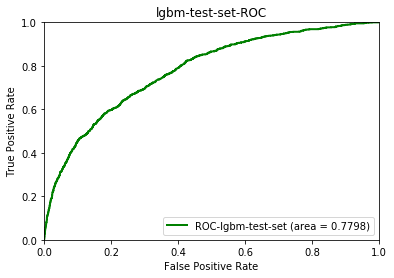

In [78]:
fpr, tpr, thresholds = roc_curve(offline_y, pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, color="g", label='ROC-lgbm-test-set (area = %0.4f)' % ( roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('lgbm-test-set-ROC')
plt.legend(loc='lower right')
plt.savefig("lgbm-test-set-ROC")
plt.show()

In [73]:
abs(fpr-tpr).max()

0.40742535737311314

In [74]:
offline = offline_xy[["user_id"]]
offline["lgbm_prob"] = pred[:,1]
offline

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


user_id  lgbm_prob
32653    32654   0.286278
36081    36082   0.042650
49056    49057   0.559482
29127    29128   0.059423
55186    55187   0.266135
31342    31343   0.191444
47880    47881   0.059260
50989    50990   0.257935
13087    13088   0.075131
6031      6032   0.035444
15738    15739   0.033928
47039    47040   0.096026
55594    55595   0.046089
21742    21743   0.139779
22378    22379   0.042967
39857    39858   0.046853
32052    32053   0.069027
6300      6301   0.180924
32112    32113   0.025089
30421    30422   0.073119
5309      5310   0.025868
33293    33294   0.062225
43473    43474   0.131377
38515    38516   0.081108
26387    26388   0.059594
13399    13400   0.090703
50086    50087   0.077511
21807    21808   0.037086
36551    36552   0.229649
46736    46737   0.151207
...        ...        ...
13536    13537   0.160529
13328    13329   0.041207
54022    54023   0.179479
8203      8204   0.062871
29715    29716   0.055514
51020    51021   0.107225
18557    18558   0.065768
39619    39620   0.050051
52327    52328   0.141397
41026    41027   0.196854
13751    13752   0.066465
52371    52372   0.074836
7446      7447   0.364989
11793    11794   0.049478
14886    14887   0.047859
36754    36755   0.148285
38056    38057   0.047988
37921    37922   0.065217
37578    37579   0.017793
45909    45910   0.085081
12617    12618   0.070071
35409    35410   0.109578
49024    49025   0.023318
48393    48394   0.205424
17373    17374   0.069075
2432      2433   0.124221
51737    51738   0.027731
26661    26662   0.028806
8570      8571   0.046004
7359      7360   0.027582

[8340 rows x 2 columns]

In [37]:
feature_name = pd.DataFrame(train_X.columns,columns = ["feature_name"])
lgbm_feature_importance_score = pd.DataFrame(lgbm_model.feature_importances_,columns = ["lgbm_score"])
lgbm_importance = pd.merge(feature_name,lgbm_feature_importance_score,left_index = True,right_index = True)
lgbm_importance

feature_name  lgbm_score
0                        bill_bank_card_num           7
1                   bl_last_bill_amountmean          28
2                       bl_credit_limitmean          23
3                       bl_bill_balancemean          29
4                 bl_lowest_repay_limitmean          25
5                         bl_consum_nummean          26
6                        bl_bill_amountmean          27
7                   bl_avail_cash_limitmean          41
8             bl_bill_diff_repay_amountmean          88
9    bl_credit_limit_diff_last_bill_amomean          40
10        bl_credit_limit_diff_bill_amomean          40
11    bl_credit_limit_diff_bill_balancemean          19
12           bl_bill_amo_div_consum_nummean          24
13              bl_grant_diff_bill_timemean          64
14                   bl_last_bill_amountmax          41
15                       bl_credit_limitmax          24
16                       bl_bill_balancemax          37
17                 bl_lowest_repay_limitmax          43
18                         bl_consum_nummax           3
19                        bl_bill_amountmax          21
20                   bl_avail_cash_limitmax          44
21             bl_bill_diff_repay_amountmax          99
22    bl_credit_limit_diff_last_bill_amomax          15
23         bl_credit_limit_diff_bill_amomax          21
24     bl_credit_limit_diff_bill_balancemax          38
25            bl_bill_amo_div_consum_nummax          31
26               bl_grant_diff_bill_timemax          40
27                   bl_last_bill_amountstd          15
28                       bl_credit_limitstd           7
29                       bl_bill_balancestd          15
..                                      ...         ...
143                        bh_time_max_diff          69
144                       grant_bh_diff_bef         108
145                              has_record           0
146                        total_counts_bef          35
147                         dup_counts_time         220
148                                gender_0          62
149                                gender_1           4
150                                gender_2          28
151                             ocupation_0           0
152                             ocupation_2           0
153                             ocupation_3           1
154                             ocupation_4           1
155                             education_0           0
156                             education_2          26
157                             education_3           0
158                             education_4          24
159                              marriage_0           1
160                              marriage_1           4
161                              marriage_2           2
162                              marriage_3           0
163                              marriage_4           2
164                             residence_0           0
165                             residence_1           2
166                             residence_2           6
167                             residence_3           3
168                             residence_4           4
169                        bank_expenditure          25
170                            bank_revenue          32
171                             bank_income          13
172                     bank_diff_rev_exped          41

[173 rows x 2 columns]

In [38]:
lgbm_importance.to_csv("C:\\Users\\CDA\\graduated_design\\score\\lgbm_importance.csv",index = False,encoding = "utf-8")

In [75]:
offline.to_csv("C:\\Users\\CDA\\graduated_design\\prob\\lgbm_prob_112.csv",index = False,encoding = "utf-8")

In [83]:
def lgbm_model(train_x,train_y,val_x):
    lgbm_model = lgb.LGBMClassifier(random_state = 2,
                       min_child_weight = 0.8,reg_lambda = 0.4,n_estimator = 400,reg_alpha = 0.9,
                       min_child_samples = 30,min_split_gain = 0.5,num_leaves = 32,subsample = 0.8,colsample_bytree = 0.7,
                       max_depth = 7,learning_rate = 0.07) 
    lgbm_model.fit(train_x,train_y)
    pred = lgbm_model.predict_proba(val_x)
    return pred[:,1]

('ks', 0.42504301486402518)
('ks', 0.41789139543405185)
('ks', 0.39583592219089048)
('ks', 0.43823870003046772)
('ks', 0.40945986525858291)


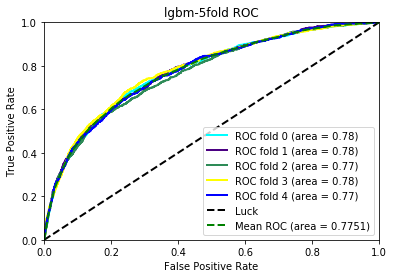

In [93]:
from sklearn.metrics import roc_curve, auc  
kfold_plot(train_val_x,train_val_y,lgbm_model)

In [92]:
def kfold_plot(train_x, train_y, model):
    kf = StratifiedKFold(n_splits=5,random_state = 100)

    scores = []
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    exe_time = []
    colors = ['cyan', 'indigo', 'seagreen', 'yellow', 'blue']
    #cmap = matplotlib.colors.ListedColormap(colors)
    lw = 2

    #flg,ax = plt.subplots(figsize = (8,5))
    i = 0
    for train_index,val_index in kf.split(train_x,train_y):
        t_X, v_X = train_x.iloc[train_index], train_x.iloc[val_index]
        t_y, v_y = train_y.iloc[train_index], train_y.iloc[val_index]
        begin_t = time.time()
        predictions = model(t_X,t_y,v_X)
        end_t = time.time()
        exe_time.append(round(end_t-begin_t, 3))
        scores.append(roc_auc_score(v_y.astype(float), predictions))
        fpr, tpr, thresholds = roc_curve(v_y, predictions)#?
        mean_tpr += interp(mean_fpr, fpr, tpr)#?
        mean_tpr[0] = 0.0#?
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=lw, color=colors[i], label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        i += 1
        print(ks(predictions,v_y))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k', label='Luck')
    mean_tpr /= kf.get_n_splits(train_val_x, train_val_y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)    
    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--', label='Mean ROC (area = %0.4f)' % mean_auc, lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('lgbm-5fold ROC')
    plt.legend(loc='lower right')
    plt.savefig("lgbm-5fold-ROC")
    plt.show()

In [8]:
param = { "random_state" : 2,"subsample" : 0.75,"colsample_bytree": 0.7,"max_depth": 7,
            "min_child_weight":1.3,"reg_alpha":0.5,"learning_rate":0.03,"reg_lambda":0.3,
            "min_child_samples":34,"min_split_gain":0.5,"num_leaves":25}
param["metric"] = "auc"
d_train = lgb.Dataset(train_X, label=train_y)  
d_test = lgb.Dataset(val_X,label = val_y)
lgb_model = lgb.train(param,d_train,1000,valid_sets = d_test,early_stopping_rounds = 100)

[1]	valid_0's auc: 0.721419
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.73079
[3]	valid_0's auc: 0.732033
[4]	valid_0's auc: 0.73869
[5]	valid_0's auc: 0.745318
[6]	valid_0's auc: 0.745988
[7]	valid_0's auc: 0.746574
[8]	valid_0's auc: 0.745546
[9]	valid_0's auc: 0.746078
[10]	valid_0's auc: 0.746805
[11]	valid_0's auc: 0.746249
[12]	valid_0's auc: 0.745323
[13]	valid_0's auc: 0.744718
[14]	valid_0's auc: 0.744623
[15]	valid_0's auc: 0.746734
[16]	valid_0's auc: 0.748044
[17]	valid_0's auc: 0.748206
[18]	valid_0's auc: 0.748938
[19]	valid_0's auc: 0.748579
[20]	valid_0's auc: 0.749938
[21]	valid_0's auc: 0.750453
[22]	valid_0's auc: 0.750647
[23]	valid_0's auc: 0.750722
[24]	valid_0's auc: 0.750587
[25]	valid_0's auc: 0.75065
[26]	valid_0's auc: 0.751467
[27]	valid_0's auc: 0.75138
[28]	valid_0's auc: 0.751177
[29]	valid_0's auc: 0.751224
[30]	valid_0's auc: 0.751067
[31]	valid_0's auc: 0.751119
[32]	valid_0's auc: 0.750867
[33]	valid_0's auc: 0.

In [7]:
?lgb.cv

In [14]:
?lgb.LGBMClassifier

In [19]:
def ks(y_predicted, y_true):
    label=y_true
    #label = y_true.get_label()
    fpr,tpr,thres = metrics.roc_curve(label,y_predicted,pos_label=1)
    return 'ks',abs(fpr - tpr).max()

lgbm start training

In [1]:
from sklearn.model_selection import GridSearchCV

In [6]:
import numpy as np  
import pandas as pd  
import scipy as sp  
import copy,os,sys,psutil  
import lightgbm as lgb  
from lightgbm.sklearn import LGBMRegressor  
from sklearn.model_selection import GridSearchCV  
from sklearn.datasets import dump_svmlight_file  
#from svmutil import svm_read_problem  
  
from sklearn import  metrics   #Additional scklearn functions  
from sklearn.grid_search import GridSearchCV   #Perforing grid search  
  
from featureProject.ly_features import make_train_set  
#from featureProject.my_import import split_data  
# from featureProject.features import TencentReport  
#from featureProject.my_import import feature_importance2file  
  
  
def print_best_score(gsearch,param_test):  
     # 输出best score  
    print("Best score: %0.3f" % gsearch.best_score_)  
    print("Best parameters set:")  
    # 输出最佳的分类器到底使用了怎样的参数  
    best_parameters = gsearch.best_estimator_.get_params()  
    for param_name in sorted(param_test.keys()):  
        print("\t%s: %r" % (param_name, best_parameters[param_name]))  
  
def lightGBM_CV():  
    print ('获取内存占用率： '+(str)(psutil.virtual_memory().percent)+'%')  
    data, labels = make_train_set(24000000,25000000)  
    values = data.values;  
    param_test = {  
        'max_depth': range(5,15,2),  
        'num_leaves': range(10,40,5),  
    }  
    estimator = LGBMRegressor(  
        num_leaves = 50, # cv调节50是最优值  
        max_depth = 13,  
        learning_rate =0.1,   
        n_estimators = 1000,   
        objective = 'regression',   
        min_child_weight = 1,   
        subsample = 0.8,  
        colsample_bytree=0.8,  
        nthread = 7,  
    )  
    gsearch = GridSearchCV( estimator , param_grid = param_test, scoring='roc_auc', cv=5 )  
    gsearch.fit( values, labels )  
    gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_  
    print_best_score(gsearch,param_test)  
  
  
if __name__ == '__main__':  
    lightGBM_CV()  

ImportError: No module named 'featureProject'